# Ford Gobike Data Exploration

## 1. Setup Environment and Read data

This document explores a dataset containing bike rides duration, stations location and riders information for approximately 2 million Ford gobike rides.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from os import listdir 

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
folder_name_of_csvs = 'Data'
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df = pd.concat(list_csvs, ignore_index=True)

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(5)

(2239215, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


## 2. Preliminary Wrangling

In [4]:
# create new field 'duration_min' to convert bike share duration seconds to minutes
df['duration_min'] = round(df['duration_sec'] / 60,0).astype(int)

In [5]:
# create new fields 'start_year', 'start_month', 'start_day', 'start_hour', 'start_dayofweek' to breakdown 'start_time' information
df['start_year'] = pd.to_datetime(df.start_time, errors='coerce').dt.year
df['start_month'] = pd.to_datetime(df.start_time, errors='coerce').dt.month
df['start_day'] = pd.to_datetime(df.start_time, errors='coerce').dt.day
df['start_hour'] = pd.to_datetime(df.start_time, errors='coerce').dt.hour
df['start_dayofweek'] = pd.to_datetime(df.start_time, errors='coerce').dt.day_name()

In [6]:
# order day of week from Monday to Sunday
df.start_dayofweek = pd.Categorical(df.start_dayofweek, ordered=True, 
                                    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# confirm this field's data type
df['start_dayofweek'].dtype.name

'category'

In [7]:
# calculate member's age based on their birth year
df['member_age'] = 2019 - df['member_birth_year']

In [8]:
# explore member age structure
df['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9])

count    2.110512e+06
mean     3.567775e+01
std      1.040037e+01
min      1.800000e+01
10%      2.500000e+01
20%      2.700000e+01
30%      2.900000e+01
40%      3.100000e+01
50%      3.300000e+01
60%      3.600000e+01
70%      3.900000e+01
80%      4.300000e+01
90%      5.100000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [9]:
# create a new field to reflect member age range
df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '> 60')

In [10]:
# After generating new field, drop abundant fields
df.drop(['duration_sec', 'start_time', 'end_time', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 
         'end_station_name', 'end_station_latitude', 'end_station_longitude', 'member_birth_year'], axis = 1, inplace = True)


## 3. Data Exploration
### 3.1 Dataset Overview
#### What is the structure of the dataset?

In [11]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(5)

(2239215, 14)
start_station_id            float64
end_station_id              float64
bike_id                       int64
user_type                    object
member_gender                object
bike_share_for_all_trip      object
duration_min                  int64
start_year                    int64
start_month                   int64
start_day                     int64
start_hour                    int64
start_dayofweek            category
member_age                  float64
member_age_bins              object
dtype: object


,start_station_id,end_station_id,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,start_year,start_month,start_day,start_hour,start_dayofweek,member_age,member_age_bins
0,120.0,285.0,2765,Subscriber,Male,No,1255,2018,1,31,22,Wednesday,33.0,30 - 40
1,15.0,15.0,2815,Customer,NaN,No,1424,2018,1,31,16,Wednesday,NaN,> 60
2,304.0,296.0,3039,Customer,Male,No,1193,2018,1,31,14,Wednesday,23.0,20 - 30
3,75.0,47.0,321,Customer,NaN,No,1018,2018,1,31,14,Wednesday,NaN,> 60
4,74.0,19.0,617,Subscriber,Male,No,666,2018,1,31,19,Wednesday,28.0,20 - 30


There are 2,239,215 bike share records in the dataset with 14 features (start_station_id, end_station_id, bike_id, user_type, member_gender, bike_share_for_all_trip, duration_min, start_year, start_month, start_day, start_hour, start_dayofweek, member_age, member_age_bins). Most variables are numeric in nature, but the variables user_type, member_gender, bike_share_for_all_trip, member_age_bins are nomical categorical variables. And variable start_dayofweek is ordered factor variable with the following levels.

start_dayofweek: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday

#### What questions can be answered by exploring the dataset?

1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How does rides trend vary per age, gender?
3. How long does the average trip take per user type?

### 3.2 When are most trips taken in terms of time of day, day of the week, or month of the year?
When are most trips taken in terms of time of day?

In [12]:
# group data by start_hour
trip_by_hour_df = df.groupby('start_hour').agg({'bike_id':'count'}).reset_index()
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100
trip_by_hour_df.head()

,start_hour,bike_id
0,0,0.545146
1,1,0.318013
2,2,0.200159
3,3,0.112852
4,4,0.147954


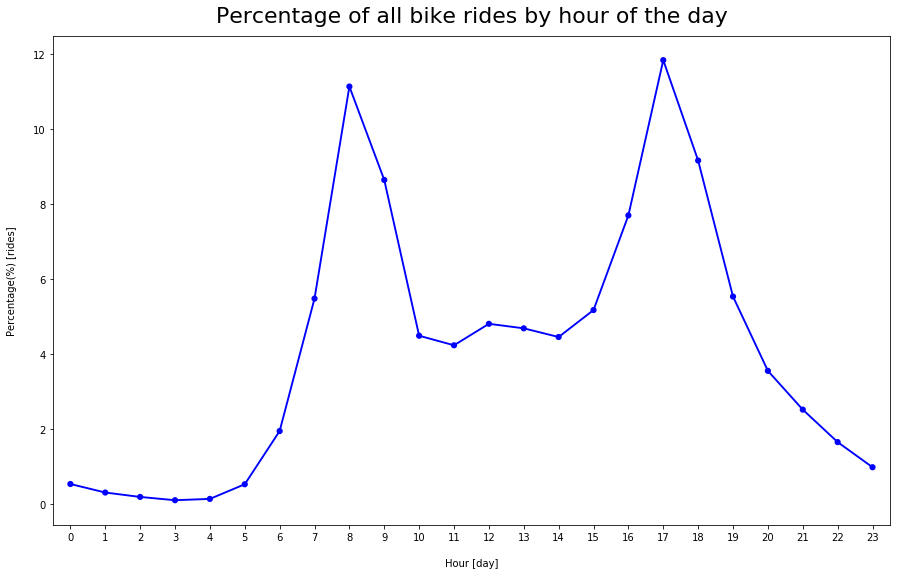

In [13]:
# plot ride count percentage for each hour of the day
plt.figure(figsize=(15,9))
sb.pointplot(x='start_hour', y='bike_id', scale=.7, color='blue', data=trip_by_hour_df)
plt.title('Percentage of all bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('Hour [day]', labelpad=16)
plt.ylabel('Percentage(%) [rides]', labelpad=16);

The peak hour during the day is 7am to 9am and 4pm to 6pm.

When are most trips taken in terms of day of the week?

In [14]:
# group data by day of week
trip_by_weekday_df = df.groupby('start_dayofweek').agg({'bike_id':'count'})
trip_by_weekday_df['bike_id'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100
trip_by_weekday_df

,bike_id
start_dayofweek,
Monday,15.633470
Tuesday,17.081120
Wednesday,17.052628
Thursday,17.317185
Friday,15.546341
Saturday,9.290801
Sunday,8.078456


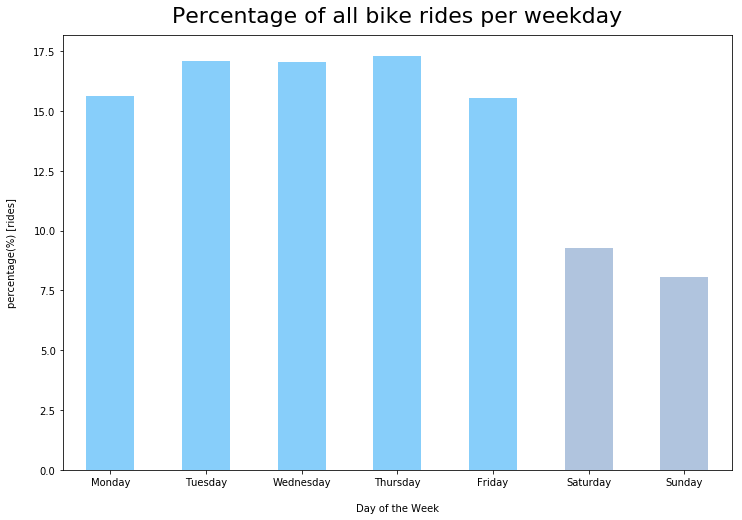

In [15]:
# plot ride count percentage for each day of week
weekday_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['lightskyblue','lightskyblue','lightskyblue','lightskyblue','lightskyblue','lightsteelblue','lightsteelblue']
trip_by_weekday_df.reindex(weekday_index)['bike_id'].plot(kind='bar', color=colors, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('Day of the Week', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360);

The difference between weekday usage and weekend usage is very obvious. Majority of the riders use Ford Gobike during weekdays.

When are most trips taken in terms of month of the year?
Here we only investigate on year of 2018's data to understand the monthly trend for a full year.

In [16]:
# get only 2018 data
df_2018 = df[df['start_year'] == 2018]

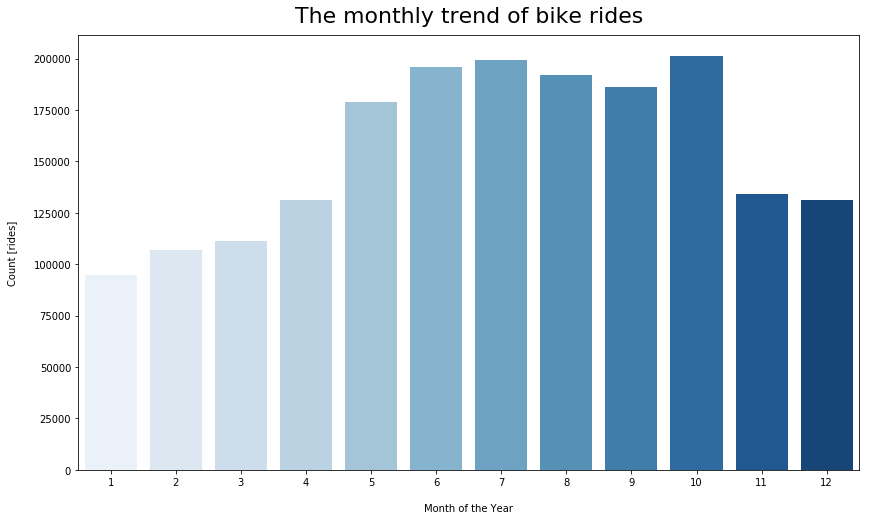

In [18]:
# plot ride counts for each month of the year
plt.figure(figsize=(14,8))
sb.countplot(x='start_month', palette="Blues", data=df_2018.sort_values(by='start_month'))
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('Month of the Year', labelpad=16)
plt.ylabel('Count [rides]', labelpad=16);

Gobike were used more often from May to October than the other months. This might because weather is more pleasant to ride a bike during summer and fall. But in winter and spring, weather is too cold to ride a bike.

### 3.3 How does rides trend vary per age, gender?

How does rides trend vary per age?

In [19]:
# group data by member age groups
trip_by_age_df = df.groupby('member_age_bins').agg({'bike_id':'count'})
trip_by_age_df['bike_id'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100
trip_by_age_df

,bike_id
member_age_bins,
10 - 20,1.178225
20 - 30,32.406312
30 - 40,36.365601
40 - 50,14.439525
50 - 60,7.542018
> 60,8.068319


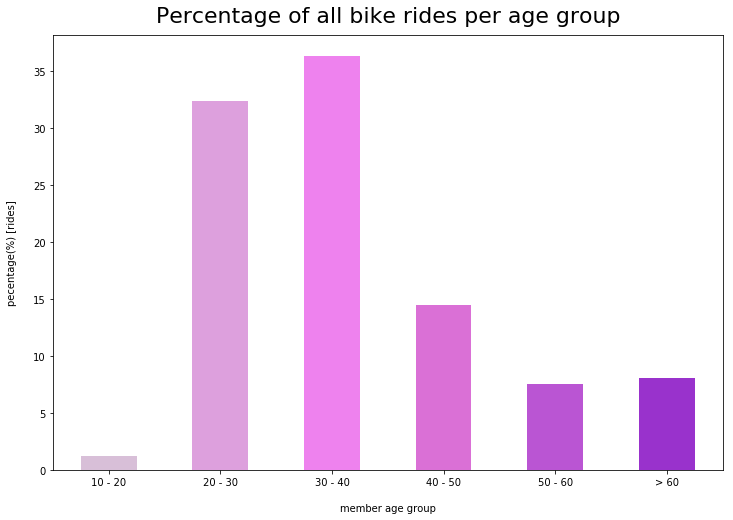

In [20]:
# plot ride count percentage for each age group
colors = ['Thistle','Plum','Violet','Orchid','MediumOrchid','DarkOrchid']
trip_by_age_df['bike_id'].plot(kind='bar', color = colors, figsize=(12,8))
plt.title('Percentage of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360);

Members in the 20-30 and 30-40 age groups tend to use Gobike more.

How does rides trend vary per gender?

In [22]:
# group data by member gender
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})
trip_by_gender_df['bike_id'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100
trip_by_gender_df

,bike_id
member_gender,
Female,24.756048
Male,73.619690
Other,1.624262


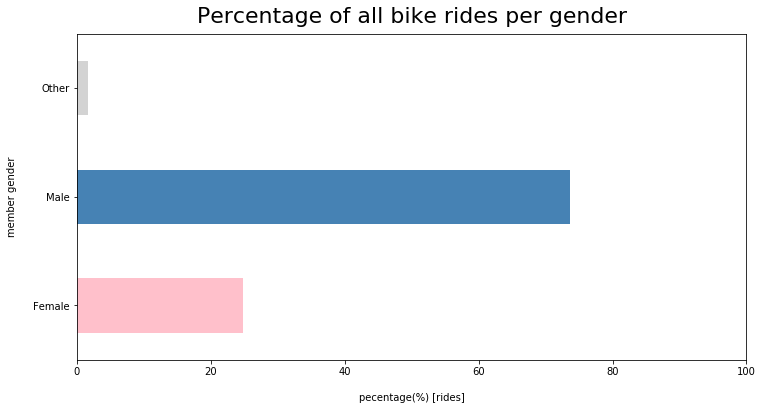

In [23]:
# plot ride count percentage for each gender
colors = ['pink', 'steelblue', 'lightgrey']
trip_by_gender_df['bike_id'].plot(kind='barh', color=colors, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100);

There are more male riders than female riders. Male riders are 3 times more than female riders.

### 3.4 How long does the average trip take per user type?
Count of bike rides of subscribers and customers:

In [24]:
# group data by user type
rides_per_user_type = df.groupby('user_type').size().reset_index(name='perc')
rides_per_user_type['perc'] = (rides_per_user_type['perc']/rides_per_user_type['perc'].sum())*100
rides_per_user_type

,user_type,perc
0,Customer,14.441891
1,Subscriber,85.558109


85.6% of bike rides are from subscribers, and 14.4% is from customers.

How long does the average trip take per user type?

In [38]:
# calculate average trip duration by user type
duration_min_per_user_type = df.groupby('user_type')['duration_min'].mean()
duration_min_per_user_type

user_type
Customer      31.017246
Subscriber    11.077435
Name: duration_min, dtype: float64

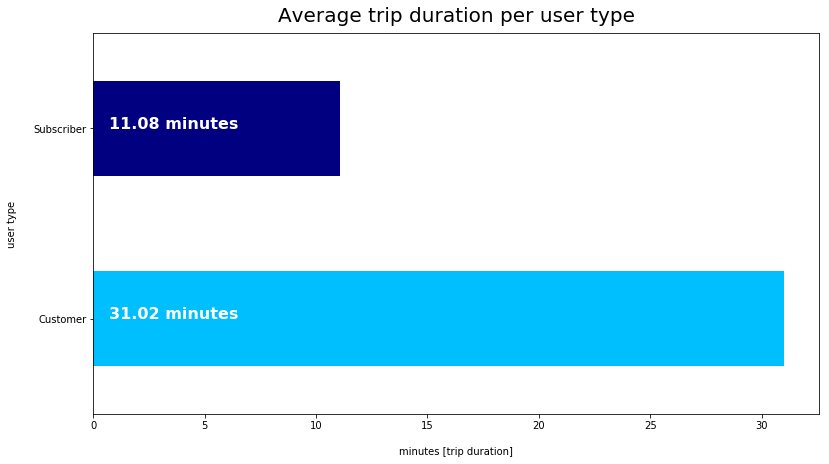

In [46]:
# plot average trip duration for each user type
new_color=['deepskyblue', 'navy']
duration_min_per_user_type.plot(kind='barh', color=new_color, figsize=(13,7))
plt.title('Average trip duration per user type', fontsize=20, y=1.015)
plt.ylabel('user type', labelpad=16)
plt.xlabel('minutes [trip duration]', labelpad=16)

for i,j in enumerate(duration_min_per_user_type):
    plt.text(.7,i,str(round(j,2))+' minutes', weight='bold', ha='left', fontsize=16, color="white");

Subscibers tend to spend less time for each trip compared to other customers.

## Conclusions

1. The peak hour during the day is 7am to 9am and 4pm to 6pm.
2. The difference between weekday usage and weekend usage is very obvious. Majority of the riders use Ford Gobike during weekdays.
3. Gobike were used more often from May to October than the other months. This might because weather is more pleasant to ride a bike during summer and fall. But in winter and spring, weather is too cold to ride a bike.
4. Members in the 20-30 and 30-40 age groups tend to use Gobike more.
5. There are more male riders than female riders. Male riders are 3 times more than female riders.
6. Subscibers tend to spend less time for each trip compared to other customers.